Q1. Explain the difference between linear regression and logistic regression models. Provide an example of
a scenario where logistic regression would be more appropriate.

### Difference Between Linear Regression and Logistic Regression

**1. Purpose:**
   - **Linear Regression:** Predicts a continuous numerical outcome. It estimates the relationship between the dependent variable (target) and one or more independent variables (features) by fitting a linear equation to the observed data.
   - **Logistic Regression:** Predicts a binary (or categorical) outcome. It models the probability of a certain class or event, such as pass/fail, win/lose, yes/no, etc.

**2. Output:**
   - **Linear Regression:** The output is a continuous value, which can theoretically range from negative to positive infinity.
   - **Logistic Regression:** The output is a probability value between 0 and 1. This probability is then typically converted into a binary outcome using a threshold (commonly 0.5).

**3. Model Equation:**
   - **Linear Regression:** The model equation is of the form:
     \[
     y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n
     \]
     where \(y\) is the dependent variable and \(x_1, x_2, \dots, x_n\) are the independent variables.
   - **Logistic Regression:** The model uses the logistic function (sigmoid) to map the output to a probability. The equation is:
     \[
     \text{logit}(p) = \log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n
     \]
     where \(p\) is the probability of the event occurring (e.g., success).

**4. Assumptions:**
   - **Linear Regression:** Assumes a linear relationship between the independent and dependent variables, homoscedasticity (constant variance of errors), and normally distributed errors.
   - **Logistic Regression:** Assumes a linear relationship between the independent variables and the log-odds of the dependent variable. It does not assume homoscedasticity or normally distributed errors.

**5. Use Cases:**
   - **Linear Regression:** Used when the target variable is continuous, such as predicting house prices, temperature, or sales figures.
   - **Logistic Regression:** Used when the target variable is categorical, particularly binary.

### Example Scenario for Logistic Regression

**Scenario:**
Suppose you are working on a healthcare project where you need to predict whether a patient will develop a certain disease (e.g., diabetes) based on features like age, weight, blood pressure, and cholesterol levels. The outcome is binary—either the patient will develop the disease (1) or will not develop it (0).

**Why Logistic Regression is Appropriate:**
In this case, logistic regression is more appropriate because the outcome variable is binary (disease/no disease). You are interested in modeling the probability that a patient will develop the disease given their features. Logistic regression will allow you to do this by estimating the probability of disease presence and classifying patients based on a threshold probability (e.g., 0.5).

In contrast, linear regression would not be suitable here because it could produce predictions outside the range of 0 to 1, which are not meaningful in the context of probabilities.

Let's solve the problem of predicting whether a patient will develop diabetes using logistic regression. We'll use a sample dataset (e.g., the Pima Indians Diabetes dataset) to demonstrate this. The dataset contains information about various medical predictor variables and one target variable, indicating whether or not a patient has diabetes.

We'll use Python and libraries like pandas, scikit-learn, and matplotlib to achieve this.

Step 1: Import Required Libraries


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset (Pima Indians Diabetes dataset)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)


In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Display the first few rows of the dataset
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Step 2: Preprocessing the Data


In [ ]:
# Separate the features (X) and the target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Step 3: Train the Logistic Regression Model


In [ ]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression()

Step 4: Make Predictions and Evaluate the Model


In [ ]:
# Predict the outcomes for the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.7532467532467533
Confusion Matrix:
[[79 20]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



Step 5: Visualize the Results


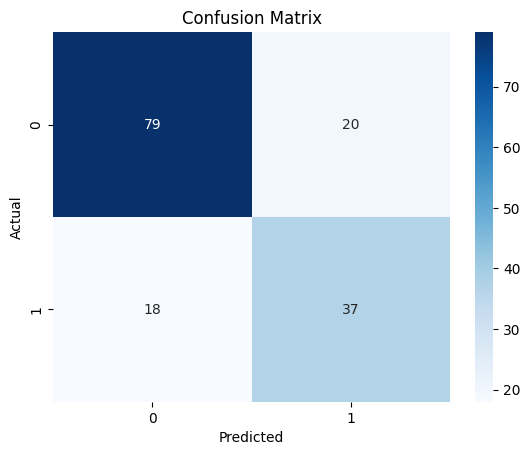

In [ ]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Step 6: Interpretation of Results
* Accuracy: The proportion of correctly classified instances out of the total instances.
* Confusion Matrix: A table that summarizes the performance of the model, showing true positives, true negatives, false positives, and false negatives.
* Classification Report: Provides detailed performance metrics like precision, recall, F1-score, and support for each class.


## Summary
* The logistic regression model predicts whether a patient will develop diabetes based on the provided features.
* The accuracy and other performance metrics will help you understand how well the model is performing. You can fine-tune the model or experiment with other algorithms if needed.



Q2. What is the cost function used in logistic regression, and how is it optimized?

In logistic regression, the cost function is known as **Log Loss** or **Cross-Entropy**. Let's break it down:

1. **Log Loss (Cross-Entropy):**
   - The Log Loss measures the difference between the predicted probabilities and the actual binary labels (0 or 1).
   - It quantifies how well the model's predictions align with the ground truth.
   - The formula for Log Loss is:
     $$ \text{Cost}(h_{\theta}(x), y) = \begin{cases} -\log(h_{\theta}(x)) & \text{if } y = 1 \\ -\log(1 - h_{\theta}(x)) & \text{if } y = 0 \end{cases} $$
     where:
     - \(h_{\theta}(x)\) represents the predicted probability (output of the sigmoid function) for input features \(x\).
     - \(y\) is the actual binary label (0 or 1).
   - The goal is to minimize this cost function during model training.

2. **Optimization:**
   - To find the optimal model parameters (weights), we use techniques like **gradient descent** or **Newton-Raphson**.
   - These optimization algorithms adjust the parameters iteratively to minimize the Log Loss.
   - The process involves computing gradients and updating weights until convergence.

Remember, Log Loss penalizes confident incorrect predictions more heavily, making it suitable for classification tasks.


Here's a Python program that implements logistic regression from scratch using the principles discussed above, including the cost function and gradient descent

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000, regularization=0.0):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization = regularization
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, h, y):
        m = len(y)
        cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
        reg_cost = (self.regularization / (2*m)) * np.sum(self.theta[1:] ** 2)
        return cost + reg_cost

    def gradient_descent(self, X, h, y):
        m = len(y)
        gradient = (1/m) * np.dot(X.T, (h - y))
        reg_term = np.concatenate([[0], (self.regularization/m) * self.theta[1:]])
        return gradient + reg_term

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
        self.theta = np.zeros(X.shape[1])

        for _ in range(self.n_iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = self.gradient_descent(X, h, y)
            self.theta -= self.learning_rate * gradient

    def predict_prob(self, X):
        X = np.insert(X, 0, 1, axis=1)
        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold

# Example usage:

# Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model from scratch
model = LogisticRegressionScratch(learning_rate=0.01, n_iterations=1000, regularization=0.1)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 83.00%


Q3. Explain the concept of regularization in logistic regression and how it helps prevent overfitting.

Regularization in logistic regression is a technique used to prevent overfitting by adding a penalty to the size of the coefficients in the model. Overfitting occurs when a model learns the noise in the training data rather than the underlying pattern, which leads to poor generalization to new, unseen data.

Here's a detailed look at how regularization works in logistic regression:

### 1. **Regularization Concepts:**

- **Objective Function:**
  Logistic regression aims to find the best parameters (coefficients) that minimize the logistic loss function. Regularization modifies this objective function by adding a penalty term, which helps in controlling the magnitude of the coefficients.

- **Types of Regularization:**
  - **L1 Regularization (Lasso):** Adds the sum of the absolute values of the coefficients to the loss function. It can drive some coefficients to zero, effectively performing feature selection.
  - **L2 Regularization (Ridge):** Adds the sum of the squared values of the coefficients to the loss function. It tends to shrink the coefficients but does not eliminate them entirely.

### 2. **Mathematical Formulation:**

For logistic regression with L2 regularization, the objective function is:

\[ \text{Loss Function} = \text{Logistic Loss} + \lambda \cdot \text{Regularization Term} \]

Where:

- **Logistic Loss Function:** Measures how well the model predicts the binary outcome.
- **Regularization Term:** For L2 regularization, this is \(\frac{1}{2} \sum_{j} \beta_j^2\). For L1 regularization, it is \(\sum_{j} |\beta_j|\).
- **λ (lambda):** Regularization parameter that controls the strength of the penalty. A higher λ value increases the penalty, which can lead to simpler models with smaller coefficients.

### 3. **How Regularization Prevents Overfitting:**

- **Constraining Coefficients:** By adding a penalty to large coefficients, regularization constrains the model's flexibility. This prevents the model from fitting noise in the training data and helps it generalize better to unseen data.
- **Simplification:** Regularization can lead to simpler models with fewer non-zero coefficients (especially with L1 regularization). Simpler models are less likely to overfit because they have fewer parameters to adjust.

### 4. **Choosing the Regularization Parameter (λ):**

- **Cross-Validation:** To determine the optimal value of λ, you can use cross-validation. By evaluating the model's performance on different subsets of the data, you can select the λ that provides the best balance between fitting the training data and generalizing to new data.

Overall, regularization is a key technique in logistic regression for controlling model complexity and improving its ability to generalize to new data.

Python program using scikit-learn to implement logistic regression with L1 and L2 regularization. This example will use a synthetic dataset to demonstrate how regularization works and how to choose the regularization parameter using cross-validation.

In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [5]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)


In [6]:
X

array([[ -4.90644173,   3.44278902,   0.55896373, ...,   3.01285895,
         -4.4970026 ,  -2.52006572],
       [  2.16261046,  -5.2866508 ,   2.60984566, ...,  -4.56217784,
          3.69866457,  -1.92328575],
       [ -4.78484428,  -3.74482699,   4.65759163, ...,  -7.8446457 ,
          2.80379841,  -2.96318945],
       ...,
       [-10.4123717 ,  -5.32462138,  -1.03805762, ...,   8.97804725,
          3.57786925,   4.28159633],
       [  0.28820005,   2.83863363,   2.79969055, ...,  -6.31392968,
         -1.85129503,  -4.92026386],
       [  2.83104091,   4.03525551,   0.25816518, ..., -12.18842291,
          2.16378616,   4.64310326]])

In [7]:
y

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# Define the parameter grid for cross-validation
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter for L2 regularization
    'penalty': ['l2'],  # L2 regularization
    'solver': ['liblinear']  # Solver that supports L1 and L2 regularization
}

In [10]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression()


In [11]:
log_reg

LogisticRegression()

In [12]:
# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='accuracy')

In [14]:
# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [15]:
# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       160
           1       0.79      0.84      0.82       140

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.83      0.82      0.82       300



In [18]:
# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [19]:
# Train the best model on the reduced data
best_model.fit(X_train_pca, y_train)


LogisticRegression(C=0.1, solver='liblinear')

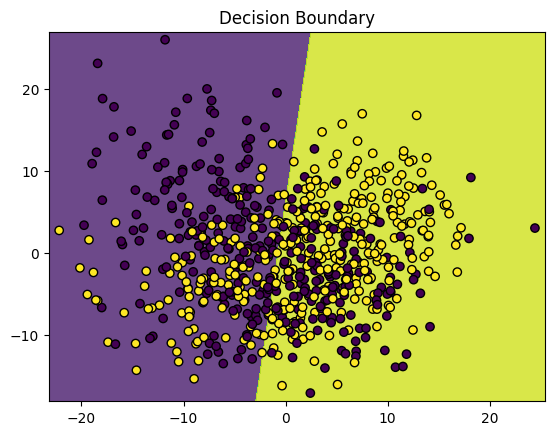

In [20]:
# Plotting the decision boundary (for visualization purposes)
def plot_decision_boundary(model, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundary using PCA-transformed data
plot_decision_boundary(best_model, X_train_pca, y_train)

Q4. What is the ROC curve, and how is it used to evaluate the performance of the logistic regression
model?

The ROC curve, or Receiver Operating Characteristic curve, is a graphical representation used to evaluate the performance of binary classification models, such as logistic regression. Here’s how it works and how it’s used:

### ROC Curve

1. **Plotting the ROC Curve**:
   - The ROC curve is a plot of the True Positive Rate (TPR) versus the False Positive Rate (FPR) at various threshold settings.
   - **True Positive Rate (TPR)**: Also known as sensitivity or recall, it is the ratio of true positives (correctly predicted positive cases) to the total actual positives. Mathematically, TPR = TP / (TP + FN).
   - **False Positive Rate (FPR)**: It is the ratio of false positives (incorrectly predicted positive cases) to the total actual negatives. Mathematically, FPR = FP / (FP + TN).

2. **Threshold Variation**:
   - In logistic regression, the model produces probabilities for each instance. By varying the threshold for classifying an instance as positive or negative, you get different TPR and FPR values.
   - The ROC curve shows how the TPR and FPR change with different threshold values.

### Using the ROC Curve

1. **Model Comparison**:
   - The ROC curve allows you to compare different models or algorithms. A model with a ROC curve that is consistently above another model’s curve indicates better performance.

2. **AUC (Area Under the Curve)**:
   - The Area Under the ROC Curve (AUC) is a single scalar value that summarizes the performance of the model across all threshold values. It ranges from 0 to 1, where a value of 0.5 indicates no discrimination (similar to random guessing), and a value of 1 indicates perfect classification.
   - A higher AUC value signifies a better model.

3. **Choosing the Threshold**:
   - The ROC curve can also help you select the optimal threshold for classification, balancing the trade-offs between TPR and FPR according to the specific needs of the problem.

### Practical Steps

1. **Generate Predictions**: Use the logistic regression model to get predicted probabilities for the positive class.
2. **Compute TPR and FPR**: For a range of threshold values, calculate TPR and FPR.
3. **Plot the ROC Curve**: Plot TPR (y-axis) against FPR (x-axis) for different thresholds.
4. **Evaluate**: Analyze the curve and the AUC to assess the model's performance.

The ROC curve is particularly useful when dealing with imbalanced datasets or when the cost of false positives and false negatives is different.

To demonstrate how to generate and evaluate the ROC curve for a logistic regression model using Python, you can use libraries such as scikit-learn, matplotlib, and numpy. Here’s a step-by-step program for solving this case:

In [22]:
## 1. Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


## 2. Load Dataset

For this example, we'll use the Iris dataset and convert it into a binary classification problem (e.g., classifying if the species is Setosa or not).





In [23]:
# Load dataset
data = load_iris()
X = data.data
y = (data.target == 0).astype(int)  # Convert to binary classification (Setosa vs. non-Setosa)


## 3. Split Data

In [24]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## 4. Train Logistic Regression Model

In [25]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

## 5. Get Predictions

In [26]:
# Get predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class


##6. Compute ROC Curve

In [27]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC
roc_auc = auc(fpr, tpr)


## 7. Plot ROC Curve

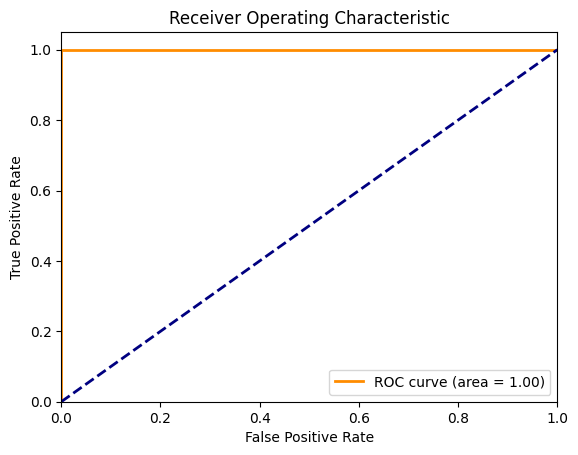

In [28]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


This code trains a logistic regression model on a binary classification problem, computes the ROC curve and AUC, and plots the ROC curve. You can adapt this code to different datasets and models as needed.